In [130]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [131]:
data = pd.read_csv('diabetes.csv')

In [132]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [133]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [139]:
data.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [140]:
zero_not_accepted = ['Glucose','BloodPressure','SkinThickness','BMI','Insulin']
for col in zero_not_accepted:
    data[col]= data[col].replace(0,np.NaN)
    mean = int(data[col].mean(skipna=True))
    data[col] = data[col].replace(np.NaN,mean)

In [141]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [142]:
X = data.iloc[:,0:8]

In [143]:
y = data.iloc[:,8]

<Axes: >

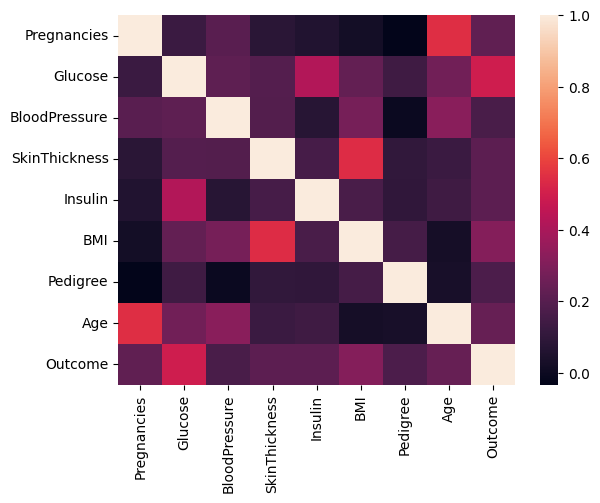

In [144]:
sns.heatmap(data.corr())

<Axes: xlabel='Outcome', ylabel='count'>

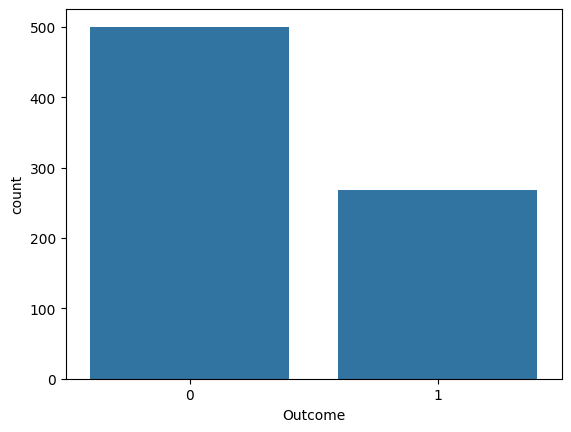

In [145]:
sns.countplot(x = data["Outcome"])

<Axes: xlabel='Pregnancies'>

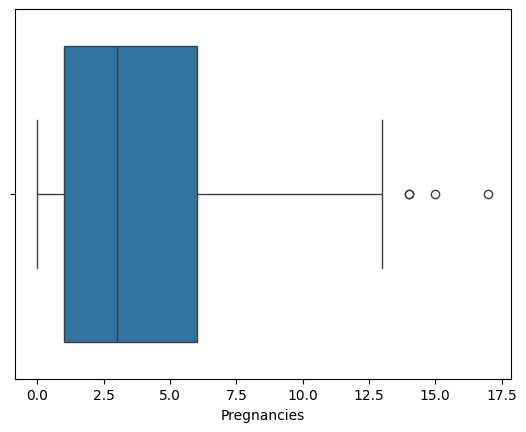

In [146]:
sns.boxplot(data = data, x = 'Pregnancies')

<Axes: xlabel='Glucose'>

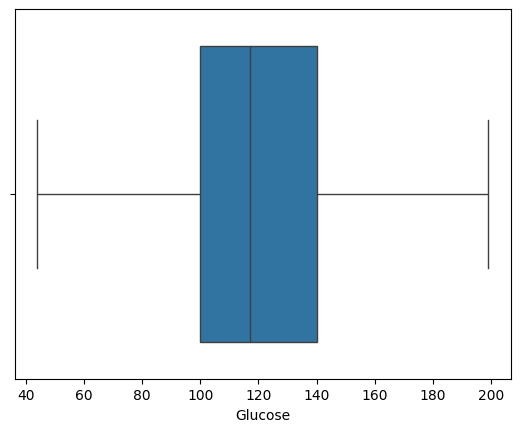

In [147]:
sns.boxplot(data = data, x = 'Glucose')

<Axes: xlabel='BloodPressure'>

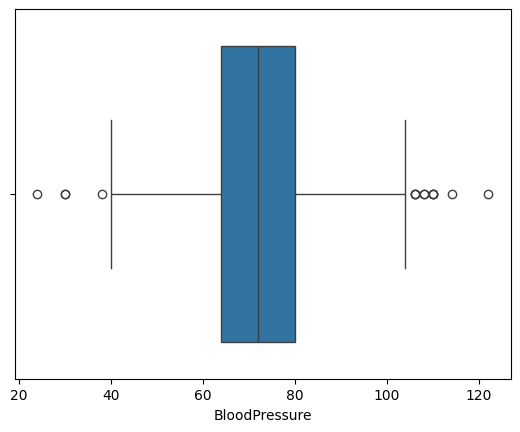

In [148]:
sns.boxplot(data = data, x = 'BloodPressure')

<Axes: xlabel='SkinThickness'>

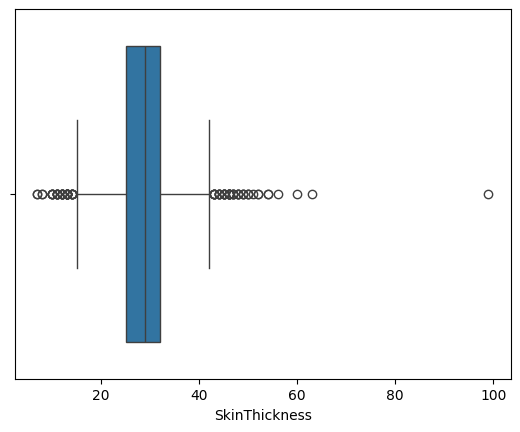

In [149]:
sns.boxplot(data = data, x = 'SkinThickness')

In [150]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [174]:
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [175]:
classifier = KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')

In [176]:
classifier.fit(X_train,y_train)
y_pred

array([0. , 0.5, 0. , 1. , 0.5, 0.5, 0. , 1. , 0.5, 0.5, 1. , 1. , 0.5,
       0. , 0. , 0.5, 0. , 0. , 0.5, 1. , 0.5, 0. , 0.5, 0. , 0.5, 1. ,
       0.5, 0. , 0. , 0. , 1. , 0.5, 1. , 1. , 0. , 1. , 1. , 0. , 0. ,
       0.5, 0. , 0.5, 0. , 1. , 0. , 0.5, 0.5, 0. , 0. , 0.5, 0. , 1. ,
       1. , 1. , 0. , 0. , 0.5, 0. , 0.5, 0.5, 1. , 0. , 0.5, 0. , 0. ,
       1. , 0. , 0.5, 0. , 0.5, 0.5, 0. , 0.5, 0. , 0. , 1. , 0.5, 0. ,
       0.5, 0. , 0.5, 0.5, 0. , 1. , 0. , 1. , 1. , 0. , 0.5, 0. , 0. ,
       0. , 0. , 0. , 0.5, 1. , 0.5, 0. , 1. , 0. , 1. , 0. , 0. , 0.5,
       1. , 0.5, 0.5, 0.5, 0. , 0.5, 0. , 1. , 0. , 1. , 0.5, 0. , 0.5,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0.5, 1. , 0.5, 0.5,
       0.5, 0. , 0.5, 0.5, 1. , 1. , 0.5, 1. , 0.5, 0. , 0. , 0. , 1. ,
       0.5, 0.5, 0.5, 0. , 0. , 0.5, 0.5, 0. , 0.5, 0.5, 0. ])

In [196]:
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)  # Convert to binary predictions

# Now compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print(conf_matrix)
print(f1_score(y_test, y_pred_binary))

[[91 16]
 [30 17]]
0.425


In [197]:
print(accuracy_score(y_test,y_pred_binary))

0.7012987012987013
